# Times and Places

[Run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/master/02_times.ipynb) or  
[Run this notebook on Sagemaker Studio Lab](https://studiolab.sagemaker.aws/import/github/AllenDowney/ElementsOfDataScience/blob/master/02_times.ipynb) or  
[Download this notebook](https://github.com/AllenDowney/ElementsOfDataScience/raw/master/02_times.ipynb).

In the previous chapter, you learned about variables and two kinds of values: integers and floating-point numbers.

In this chapter, you'll see some additional types:

* Strings, which represent text.

* Time stamps, which represent dates and times.

* And several ways to represent and display geographical locations.

Not every data science project uses all of these types, but many projects use at least one.

## Strings

A **string** is a sequence of letters, numbers, and punctuation marks.
In Python you can create a string by enclosing text between single or double quotation marks.

In [2]:
'Elements'

'Elements'

In [3]:
"of"

'of'

And you can assign string values to variables.

In [4]:
first = 'Data'

In [5]:
last = "Science"

Some arithmetic operators work with strings, but they might not do what you expect.  For example, the `+` operator **concatenates** two strings; that is, it creates a new string that contains the first string followed by the second string:

In [6]:
first + last

'DataScience'

If you want to put a space between the words, you can use a string that contains a space:

In [7]:
first + ' ' + last

'Data Science'

Strings are used to store text data like names, addresses, titles, etc.

When you read data from a file, you might see values that look like numbers, but they are actually strings, like this:

In [8]:
not_actually_a_number = '123'

If you try to do math with these strings, you *might* get an error.
For example, the following expression causes a `TypeError` with the message "can only concatenate `str` (not `int`) to `str`".

```
not_actually_a_number + 1
```

But you don't always get an error message; instead, you might get a surprising result.  For example:

In [9]:
not_actually_a_number * 3

'123123123'

If you multiply a string by an integer, Python repeats the string the given number of times.

If you have a string that contains only digits, you can convert it to an integer using the `int` function:

In [10]:
int('123')

123

Or you can convert it to a floating-point number using `float`:

In [11]:
float('123')

123.0

But if the string contains a decimal point, you can't convert it to an `int`.

Try this example to see what happens.

```
int('12.3')
```

In [12]:
# int('12.3')

Going in the other direction, you can convert any type of value to a string using `str`:

In [13]:
str(123)

'123'

In [14]:
str(12.3)

'12.3'

**Exercise**: When personal names are stored in a database, they are often stored in three variables: a given name, a family name, and sometimes a middle name.  For example, a list of great rock drummers might include:

In [15]:
given = 'Neil'
middle = 'Ellwood'
family = 'Peart'

But names are often displayed different ways in different contexts.  For example, the first time you mention someone in an article, you might give all three names, like "Neil Ellwood Peart".  But in the index of a book, you might put the family name first, like "Peart, Neil Ellwood".

Write Python expressions that use the variables `given`, `middle`, and `family` to display Neil Peart's name in these two formats. 

In [16]:
f'{given} {middle} {family}'

'Neil Ellwood Peart'

In [17]:
f'{family}, {given} {middle}'

'Peart, Neil Ellwood'

## Representing Dates and Times

If you read data from a file, you might also find that dates and times are represented with strings.

In [18]:
not_really_a_date = 'June 4, 1989'

To confirm that this value is a string, we can use the `type` function, which takes a value and reports its type.

In [19]:
type(not_really_a_date)

str

`str` indicates that the value of `not_really_a_date` is a string.

We get the same result with `not_really_a_time`, below:

In [20]:
not_really_a_time = '6:30:00'
type(not_really_a_time)

str

Strings that represent dates and times a readable for people, but they are not useful for computation.

Fortunately, Python provides libraries for working with date and time data; the one we'll use is called Pandas.
As always, we have to import a library before we use it; it is conventional to import Pandas with the abbreviated name `pd`:

In [21]:
import pandas as pd

Pandas provides a type called `Timestamp`, which represents a date and time.

It also provides a function called `Timestamp`, which we can use to convert a string to a `Timestamp`:

In [22]:
pd.Timestamp('6:30:00')

Timestamp('2023-05-08 06:30:00')

Or we can do the same thing using the variable defined above.

In [23]:
pd.Timestamp(not_really_a_time)

Timestamp('2023-05-08 06:30:00')

In this example, the string specifies a time but no date, so Pandas fills in today's date.

A `Timestamp` is a value, so you can assign it to a variable.

In [24]:
date_of_birth = pd.Timestamp('June 4, 1989')
date_of_birth

Timestamp('1989-06-04 00:00:00')

If the string specifies a date but no time, Pandas fills in midnight as the default time.

If you assign the `Timestamp` to a variable, you can use the variable name to get the year, month, and day, like this:

In [25]:
date_of_birth.year, date_of_birth.month, date_of_birth.day

(1989, 6, 4)

You can also get the name of the month and the day of the week.

In [26]:
date_of_birth.day_name(), date_of_birth.month_name()

('Sunday', 'June')

`Timestamp` provides a function called `now` that returns the current date and time.

In [27]:
now = pd.Timestamp.now()
now

Timestamp('2023-05-08 16:25:43.015779')

**Exercise:** Use the value of `now` to display the name of the current month and day of the week.

In [28]:
pd.Timestamp.now().day_name(), pd.Timestamp.now().month_name()

('Monday', 'May')

## Timedelta

`Timestamp` values support some arithmetic operations.
For example, you can compute the difference between two `Timestamp` objects:

In [29]:
age = now - date_of_birth
age

Timedelta('12391 days 16:25:43.015779')

In [30]:
now = pd.Timestamp.now()
date_of_birth = pd.Timestamp(year=1984, month=6, day=13)
age = now - date_of_birth
age

Timedelta('14208 days 16:25:43.237844')

The result is a `Timedelta` that represents the current age of someone born on `date_of_birth`.
The `Timedelta` contains `components` that store the number of days, hours, etc. between the two `Timestamp` values.

In [31]:
age.components

Components(days=14208, hours=16, minutes=25, seconds=43, milliseconds=237, microseconds=844, nanoseconds=0)

You can get one of the components like this:

In [32]:
age.days

14208

In [33]:
age.days / 365.24

38.90044901982258

The biggest component of `Timedelta` is days, not years, because days are well defined and years are problematic.

Most years are 365 days, but some are 366.  The average calendar year is 365.24 days, which is a very good approximation of a solar year, but it is not exact (see <https://pumas.jpl.nasa.gov/files/04_21_97_1.pdf>).

One way to compute age in years is to divide age in days by 365.24:

In [34]:
age.days / 365.24

38.90044901982258

But people usually report their ages in integer years.  We can use the Numpy `floor` function to round down:

In [35]:
import numpy as np

np.floor(age.days / 365.24)

38.0

Or the `ceil` function (which stands for "ceiling") to round up:

In [36]:
np.ceil(age.days / 365.24)

39.0

We can also compare `Timestamp` values to see which comes first.
For example, let's see if a person with a given birthdate has already had a birthday this year.
Here's a new `Timestamp` with the year from `now` and the month and day from `date_of_birth`.

In [37]:
bday_this_year = pd.Timestamp(now.year, 
                              date_of_birth.month, 
                              date_of_birth.day)
bday_this_year

Timestamp('2023-06-13 00:00:00')

The result represents the person's birthday this year.  Now we can use the `>` operator to check whether `now` is later than the birthday:

In [38]:
now > bday_this_year

False

The result is either `True` or `False`.
These values belong to a type called `bool`; the name comes from "Boolean algebra", which is a branch of algebra where all values are either true or false. 

In [39]:
type(True)

bool

In [40]:
type(False)

bool

**Exercise:** Any two people with different birthdays have a "Double Day" when one is twice as old as the other.
Suppose you are given two `Timestamp` values, `d1` and `d2`, that represent birthdays for two people.  Use `Timestamp` arithmetic to compute their double day.
With the following dates, the result should be December 19, 2009.

In [41]:
d1 = pd.Timestamp('2003-07-12')
d2 = pd.Timestamp('2006-09-30')

In [42]:
diff = d2 - d1
double_day = d2 + diff
double_day

Timestamp('2009-12-19 00:00:00')

## Representing Location

In addition to times and dates, we might also want to represent locations, especially if we are working with geographical data.

There are many ways to represent locations, but the most common, at least for global data, is latitude and longitude.
When stored as strings, latitude and longitude are expressed in degrees with compass directions N, S, E, and W.  For example, this string represents the location of Boston, MA, USA:

In [43]:
lat_lon_string = '42.3601° N, 71.0589° W'

When we compute with location information, we use floating-point numbers, with 

* Positive latitude for the northern hemisphere, negative latitude for the southern hemisphere, and 

* Positive longitude for the eastern hemisphere and negative longitude for the western hemisphere.

Of course, the choice of the origin and the orientation of positive and negative are arbitrary choices that were made for historical reasons.  We might not be able to change conventions like these, but we should be aware that they are conventions.

Here's how we might represent the location of Boston with two variables.

In [44]:
lat = 42.3601
lon = -71.0589

It is also possible to combine two numbers into a composite value and assign it to a single variable:

In [45]:
boston = lat, lon
boston

(42.3601, -71.0589)

The type of this variable is `tuple`, which is a mathematical term for a value that contains a sequence of elements.  Math people pronounce it "tuh' ple", but computational people usually say "too' ple".  Take your pick.

In [46]:
type(boston)

tuple

If you have a tuple with two elements, you can assign them to two variables, like this:

In [47]:
y, x = boston
y

42.3601

In [48]:
x

-71.0589

Notice that I assigned latitude to `y` and longitude to `x`, because a `y` coordinate usually goes up and down like latitude, and an `x` coordinate usually goes side-to-side like longitude.

**Exercise:** Find the latitude and longitude of the place you were born or someplace you think of as your "home town".  [You can use this web page to look it up](https://www.latlong.net/).
Make a tuple of floating-point numbers that represents that location.

In [49]:
giddings = 30.182880, -96.937290
giddings

(30.18288, -96.93729)

## Calculating Distance

If you are given two tuples that represent locations, you can compute the approximate distance between them, along the surface of the globe, using the haversine function.
If you are curious about it, [you can read an explanation in this article](https://janakiev.com/blog/gps-points-distance-python/).
To estimate a haversine distance, we have to compute the haversine function, which is defined:

$\mathrm{haversine}(\theta)=\sin^2(\theta/2)$

Where $\theta$ is an angle in radians.
We can compute this function in Python like this:

In [50]:
import numpy as np

θ = 1
np.sin(θ/2)**2

0.2298488470659301

You can use Greek letters in variable names, but there is currently no way to type them in Jupyter/Colab, so I usually copy them from a web page and paste them in.

To avoid the inconvenience, it is more common to write out letter names, like this:

In [51]:
theta = 1
np.sin(theta/2)**2

0.2298488470659301

Remember that the operator for exponentiation is `**`.  
In some other languages it's `^`, which is also an operator in Python, but it performs another operation altogether.

**Exercise:** Try out the previous expression, replacing `**` with `^`, and see what error message you get.  Remember this message in case you see it in the future!

In [52]:
# np.sin(theta/2)^2

## Defining Functions

If we are planning to use an expression like `np.sin(theta/2)**2` more than a few times, we can define a new function that computes it, like this:

In [53]:
def haversine(theta):
    """Compute the haversine function of theta."""
    return np.sin(theta/2)**2

On the first line, `def` indicates that we are defining a function.

The second line is a triple-quoted string, which is a **comment**: it describes what the function does, but has no effect when the program runs.

On the third line, `return` indicates the result of the function.

When you run the previous cell, it creates a new variable called `haversine`.  You can display its value like this:

In [54]:
haversine

<function __main__.haversine(theta)>

And you can display its type like this:

In [55]:
type(haversine)

function

So `haversine` is a variable that refers to a function.
To run the function and compute a result, we have to **call** the function and provide a value for `theta`:

In [56]:
haversine(1)

0.2298488470659301

When you define a function, you create a new variable.  But the function doesn't actually run until you call it.

## Haversine Distance

Now we can use `haversine` as part of a function that computes haversine distances.
I won't explain this function in as much detail, but if you read through it, you might get a sense of how it works.

In [57]:
def haversine_distance(coord1, coord2):
    """Haversine distance between two locations.
    
    coord1: lat-lon as tuple of float 
    coord2: lat-lon as tuple of float
    
    returns: distance in km
    """
    R = 6372.8  # Earth radius in km
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = np.radians(lat1), np.radians(lat2) 
    dphi       = np.radians(lat2 - lat1)
    dlambda    = np.radians(lon2 - lon1)
    
    a = haversine(dphi) + np.cos(phi1)*np.cos(phi2)*haversine(dlambda)
    
    distance = 2*R*np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return distance

When we call this function, we provide two tuples; each is a latitude-longitude pair.
We already have a tuple that represents the location of Boston.
Now here's a tuple that represents the location of London, England, UK:

In [58]:
london = 51.5074, -0.1278

And here's the haversine distance between Boston and London.

In [59]:
haversine_distance(boston, london)

5265.656325981014

The actual geographic distance is slightly different because Earth is not a perfect sphere.  But the error of this estimate is less than 1%.

**Exercise:** Use `haversine_distance` to compute the distance between Boston and your home town from the previous exercise.

If possible, use an online map to check the result.

In [60]:
haversine_distance(boston, giddings)

2670.9579419118486

## Geopandas

Python provides libraries for working with geographical data.  One of the most popular is Geopandas, which is based on another library called Shapely. 
Shapely provides `Point` and `LineString` values, which we'll use to represent geographic locations and lines between them.

In [1]:
from shapely.geometry import Point, LineString

We can use the tuples we defined in the previous section to create Shapely `Point` values, but we have to reverse the order of the coordinates, providing them in $x$-$y$ order rather than `lat`-`lon` order, because that's the order the `Point` function expects.

In [62]:
lat, lon = boston
p1 = Point(lon, lat)

In [63]:
lat, lon = london
p2 = Point(lon, lat)

If we display a `Point` value, we get a graphical representation, but not a very useful one.

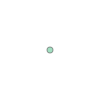

In [65]:
p1

We can use the points we just defined to create a `LineString`:

In [66]:
line = LineString([p1, p2])

If we display the result, we get another not very useful graphical representation.

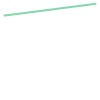

In [67]:
line

If you are running this notebook on Colab, the following cell will install Geopandas, which should only take a few seconds.  It uses features we have not seen yet; you might be able to read it and guess how it works, but you don't have to.

In [69]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install geopandas

Now we can use Geopandas to show these points and lines on a map.
The following code loads a map of the world and plots it.

/tmp/ipykernel_2039/537956351.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = gpd.datasets.get_path('naturalearth_lowres')


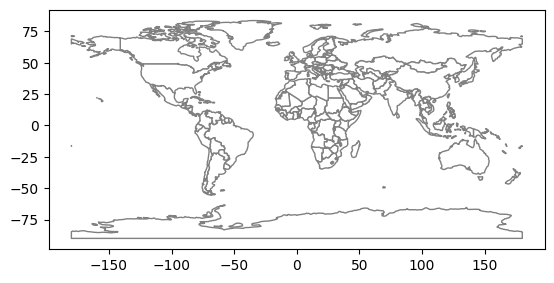

In [70]:
import geopandas as gpd

path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)
world.plot(color='white', edgecolor='gray');

By default, Geopandas uses an equirectangular projection, which provides a misleading picture of relative land areas (see <https://en.wikipedia.org/wiki/Equirectangular_projection>).
You can't make a map without making visualization decisions.

Now let's put dots on the map for Boston and London.  We have to put the `Point` values and the `LineString` into a `GeoSeries`.

In [71]:
t = [p1, p2, line]
series = gpd.GeoSeries(t)

Here's a first attempt to plot the maps and the lines together:

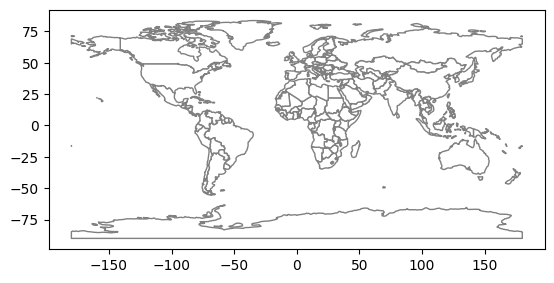

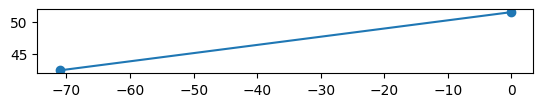

In [72]:
# plot the map
world.plot(color='white', edgecolor='gray')

# plot Boston, London, and the line
series.plot();

The two plots are on different axes, which is not what we want in this case.

To get the points and the map on the same axes, we have to use a function from Matplotlib, which is a visualization library we will use extensively.  We'll import it like this.

In [73]:
import matplotlib.pyplot as plt

The function is `gca`, which stands for "get current axes".  We can use the result to tell `plot` to put the points and lines on the current axes, rather than create a new one.

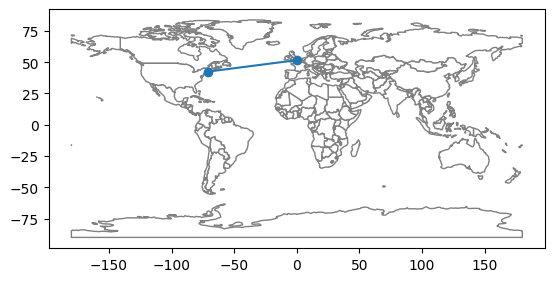

In [74]:
ax = plt.gca()
world.plot(color='white', edgecolor='gray', ax=ax)
series.plot(ax=ax);

Finally, `plt` provides a function called `figure` we can use to set the figure size.

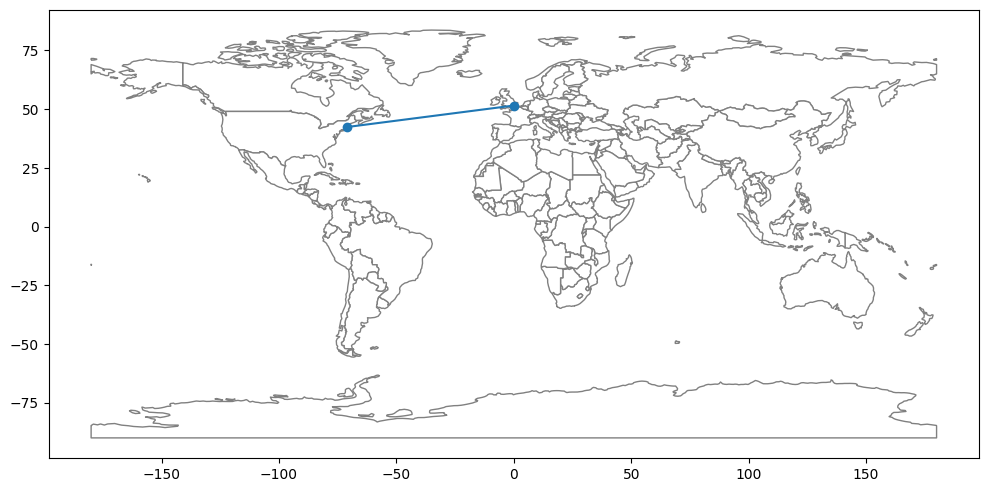

In [75]:
plt.figure(figsize=(12, 12))
ax = plt.gca()

# plot the map
world.plot(color='white', edgecolor='gray', ax=ax)

# plot Boston, London, and the line
series.plot(ax=ax);

**Exercise:** Modify the code in this section to plot a point that shows the home town you chose in a previous exercise and a line from there to Boston.

In [76]:
lat, lon = giddings
giddings = Point(lon, lat)

In [77]:
lat, lon = boston
boston = Point(lon, lat)

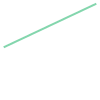

In [81]:
line = LineString([giddings, boston])
line

In [88]:
path = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(path)

/tmp/ipykernel_2039/2887765563.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path = gpd.datasets.get_path('naturalearth_lowres')


In [89]:
series = gpd.GeoSeries([giddings, boston, line])
series

0                           POINT (-96.93729 30.18288)
1                           POINT (-71.05890 42.36010)
2    LINESTRING (-96.93729 30.18288, -71.05890 42.3...
dtype: geometry

(<Axes: >, <Axes: >)

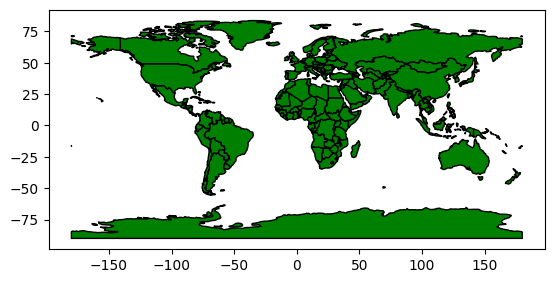

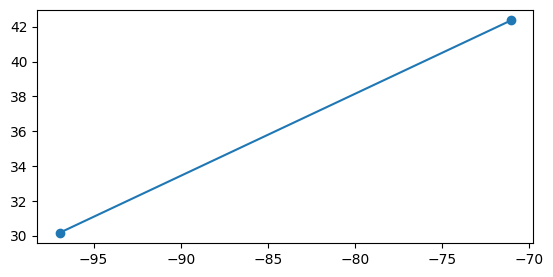

In [91]:
world.plot(color='green', edgecolor='black'), series.plot()

<Axes: >

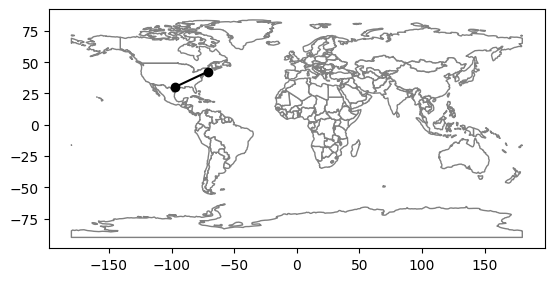

In [96]:
ax = plt.gca()
world.plot(color='white', edgecolor='gray', ax=ax)
series.plot(color='black', ax=ax)

<Axes: >

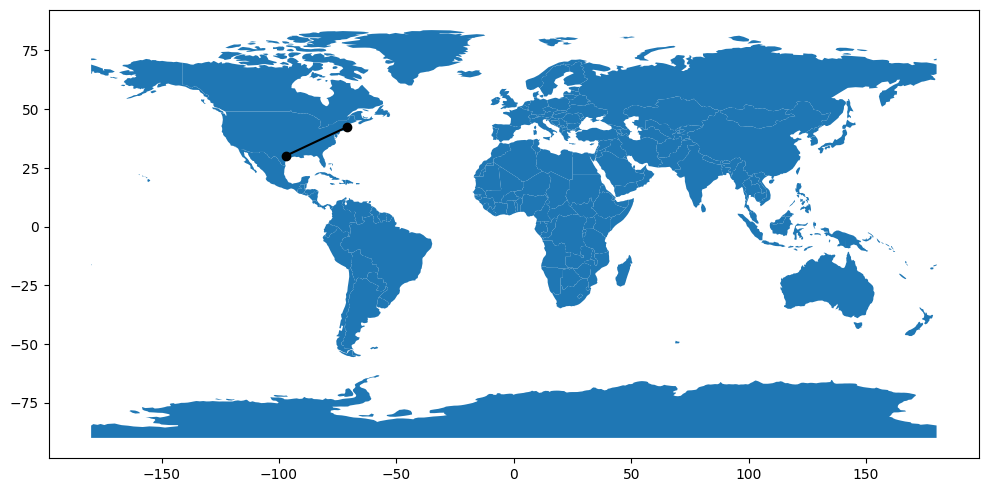

In [97]:
plt.figure(figsize=(12, 12))
ax = plt.gca()
world.plot(ax=ax)
series.plot(color='black', ax=ax)

Then go to [this online survey](https://forms.gle/2LDcqxJmcWY3Q3X47) and answer the questions there.

## Summary

This chapter presents three new data types: strings to represent letters and words, `Timestamp` objects to represent dates and times, and tuples to represent latitude, longitude pairs.

It also introduces Geopandas, a library for working with location data.

In the next chapter we'll see two ways to represent a collection of data, a Python list and a Numpy array.

*Elements of Data Science*

Copyright 2021 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)